# Project Overview

In this capstone project I am going attempt to predict when a Broadway show should close.  The idea behind this development is that an interface would be developed for producers that would allow them to enter their numbers from the previous week and determine if they are in a "red zone", therefore closing.  

I have divided the project up into three parts:

**Baseline Modeling**
In this section is an indepth Exploratory Data Analysis of Broadway weekly grosses, types of shows, and other important features that may influence whether a show will close or not.  SVM and Random Forest are used as baseline modeling techniques while addressing things like class imabalance.  

**ANN for Broadway Grosses**
Using the Keras API an Artificial Neural Network is constructed to use sophisticated algorithms to determine if a Broadway show should close or not.

**Wicked Time Series Analysis**
The core to this data is the passage of time and how much money the show is making.  It is essential to take an in depth look at time series, how it can influence our predictions, and its components like seasonality.  It is concluded with a prediction of how much money the Broadway show Wicked lost the first year of COVID-19.

# Imports

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

# The Data

In [364]:
df = pd.read_excel('Broadway_Grosses.xlsx')

In [365]:
df.head()

,date,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
0,2017-05-21,1984,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
1,2017-05-28,1984,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2,2017-06-04,1984,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
3,2017-06-11,1984,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
4,2017-06-18,1984,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [366]:
df

,date,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
0,2017-05-21,1984,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
1,2017-05-28,1984,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2,2017-06-04,1984,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
3,2017-06-11,1984,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
4,2017-06-18,1984,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8205,2015-01-25,YOU CAN'T TAKE IT WITH YOU,Play,Longacre,0,8,441995,445041,0.45,5613,5883.0,0.65,1,Comedy,0,0
8206,2015-02-01,YOU CAN'T TAKE IT WITH YOU,Play,Longacre,0,8,354139,441995,0.36,4986,5613.0,0.58,1,Comedy,0,0
8207,2015-02-08,YOU CAN'T TAKE IT WITH YOU,Play,Longacre,0,8,334244,354139,0.34,4507,4986.0,0.53,1,Comedy,0,0
8208,2015-02-15,YOU CAN'T TAKE IT WITH YOU,Play,Longacre,0,8,412057,334244,0.42,5167,4507.0,0.60,1,Comedy,0,0


In [367]:
df['type'].nunique()

3

In [368]:
df['type'].unique()

array(['Play', 'Musical', 'Special'], dtype=object)

In [369]:
print('----------------------------------------------------------')
print('The number of Broadway Shows in this dataset is:',df['show'].nunique())

----------------------------------------------------------
The number of Broadway Shows in this dataset is: 233


In [370]:
df['show'].unique()

array([1984, 'A CHRISTMAS CAROL 2019', "A SOLDIER'S PLAY",
       "AIN'T TOO PROUD", 'A BRONX TALE THE MUSICAL',
       'A DELICATE BALANCE 2014', "A DOLL'S HOUSE, PART 2",
       "A GENTLEMAN'S GUIDE TO LOVE AND MURDER",
       'A VIEW FROM THE BRIDGE 2015', 'AIRLINE HIGHWAY', 'ALADDIN',
       'ALL MY SONS 2019', 'AMERICAN SON', 'AMERICAN UTOPIA',
       'ALLEGIANCE', 'ALTON BROWN LIVE: EAT YOUR SCIENCE',
       'AMAZING GRACE', 'AMÉLIE', 'AMERICAN PSYCHO', 'AN ACT OF GOD',
       'AN ACT OF GOD 2016', 'AN AMERICAN IN PARIS', 'ANASTASIA',
       'ANGELS IN AMERICA 2018', 'BANDSTAND', 'BARRY MANILOW',
       'BE MORE CHILL', 'BEAUTIFUL', 'BEETLEJUICE', 'BETRAYAL 2019',
       'BURN THIS 2019', 'BERNHARDT/HAMLET', 'BLACK TO THE FUTURE',
       'BLACKBIRD', 'BRIGHT STAR', "CABARET '14", 'CAROUSEL 2018',
       'CATS 2016', 'CELEBRITY AUTOBIOGRAPHY',
       'CHARLIE AND THE CHOCOLATE FACTORY', 'CHICAGO', 'CHOIR BOY',
       'CHILDREN OF A LESSER GOD 2018', 'CHINA DOLL', 'COME FROM AWAY',

In [371]:
df.isna().sum()

date                  0
show                  0
type                  0
theatre               0
previews              0
performances          0
grosses               0
prev_week_gross       0
GG%GP                 0
attend                0
prev_week_attend    213
%cap                  0
close_month           0
genre                 0
tony_noms             0
tony_awards           0
dtype: int64

In [372]:
df['show'] = df['show'].str.capitalize()

In [373]:
df = df.dropna()

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7978 entries, 21 to 8209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7978 non-null   datetime64[ns]
 1   show              7978 non-null   object        
 2   type              7978 non-null   object        
 3   theatre           7978 non-null   object        
 4   previews          7978 non-null   int64         
 5   performances      7978 non-null   int64         
 6   grosses           7978 non-null   int64         
 7   prev_week_gross   7978 non-null   object        
 8   GG%GP             7978 non-null   float64       
 9   attend            7978 non-null   int64         
 10  prev_week_attend  7978 non-null   float64       
 11  %cap              7978 non-null   float64       
 12  close_month       7978 non-null   int64         
 13  genre             7978 non-null   object        
 14  tony_noms         7978 

In [375]:
df['prev_week_gross'] = df['prev_week_gross'].values.astype('float32')

<ipython-input-375-848dedf7b931>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7978 entries, 21 to 8209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7978 non-null   datetime64[ns]
 1   show              7978 non-null   object        
 2   type              7978 non-null   object        
 3   theatre           7978 non-null   object        
 4   previews          7978 non-null   int64         
 5   performances      7978 non-null   int64         
 6   grosses           7978 non-null   int64         
 7   prev_week_gross   7978 non-null   float32       
 8   GG%GP             7978 non-null   float64       
 9   attend            7978 non-null   int64         
 10  prev_week_attend  7978 non-null   float64       
 11  %cap              7978 non-null   float64       
 12  close_month       7978 non-null   int64         
 13  genre             7978 non-null   object        
 14  tony_noms         7978 

In [377]:
df.describe()

,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,tony_noms,tony_awards
count,7978.000000,7978.000000,7.978000e+03,7978.000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000
mean,0.500376,7.429556,9.756514e+05,966886.125,0.736296,8512.940963,8432.167837,0.870223,0.129732,6.666834,2.755076
std,1.830696,1.968312,5.829954e+05,586386.000,0.248156,2827.493530,2889.371202,0.136111,0.336029,4.849554,3.325390
min,0.000000,0.000000,4.849600e+04,32574.000,0.030000,1384.000000,500.000000,0.230000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,5.825955e+05,571956.500,0.540000,6474.250000,6387.500000,0.780000,0.000000,2.000000,0.000000
50%,0.000000,8.000000,8.381615e+05,831056.500,0.710000,8107.000000,8060.500000,0.900000,0.000000,7.000000,1.000000
75%,0.000000,8.000000,1.209606e+06,1203708.000,0.930000,10483.750000,10447.750000,0.990000,0.000000,10.000000,5.000000
max,8.000000,17.000000,4.041493e+06,4041493.000,1.700000,24305.000000,17517.000000,1.040000,1.000000,16.000000,11.000000


In [378]:
df.isna().sum()

date                0
show                0
type                0
theatre             0
previews            0
performances        0
grosses             0
prev_week_gross     0
GG%GP               0
attend              0
prev_week_attend    0
%cap                0
close_month         0
genre               0
tony_noms           0
tony_awards         0
dtype: int64

In [379]:
df = df.set_index('date')

In [380]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2019-11-17,A christmas carol 2019,Play,Lyceum,8,0,257525,106450.0,0.30,4194,1651.0,0.62,0,Seasonal,5,3
2019-11-24,A christmas carol 2019,Play,Lyceum,1,7,384493,257525.0,0.45,5590,4194.0,0.82,0,Seasonal,5,3
2019-12-01,A christmas carol 2019,Play,Lyceum,0,9,734745,384493.0,0.77,5988,5590.0,0.78,0,Seasonal,5,3
2019-12-08,A christmas carol 2019,Play,Lyceum,0,8,757702,734745.0,0.90,6164,5988.0,0.91,0,Seasonal,5,3
2019-12-15,A christmas carol 2019,Play,Lyceum,0,8,822983,757702.0,0.97,6619,6164.0,0.98,0,Seasonal,5,3


# EDA

array([[<AxesSubplot:title={'center':'previews'}>,
        <AxesSubplot:title={'center':'performances'}>,
        <AxesSubplot:title={'center':'grosses'}>],
       [<AxesSubplot:title={'center':'prev_week_gross'}>,
        <AxesSubplot:title={'center':'GG%GP'}>,
        <AxesSubplot:title={'center':'attend'}>],
       [<AxesSubplot:title={'center':'prev_week_attend'}>,
        <AxesSubplot:title={'center':'%cap'}>,
        <AxesSubplot:title={'center':'close_month'}>],
       [<AxesSubplot:title={'center':'tony_noms'}>,
        <AxesSubplot:title={'center':'tony_awards'}>, <AxesSubplot:>]],
      dtype=object)

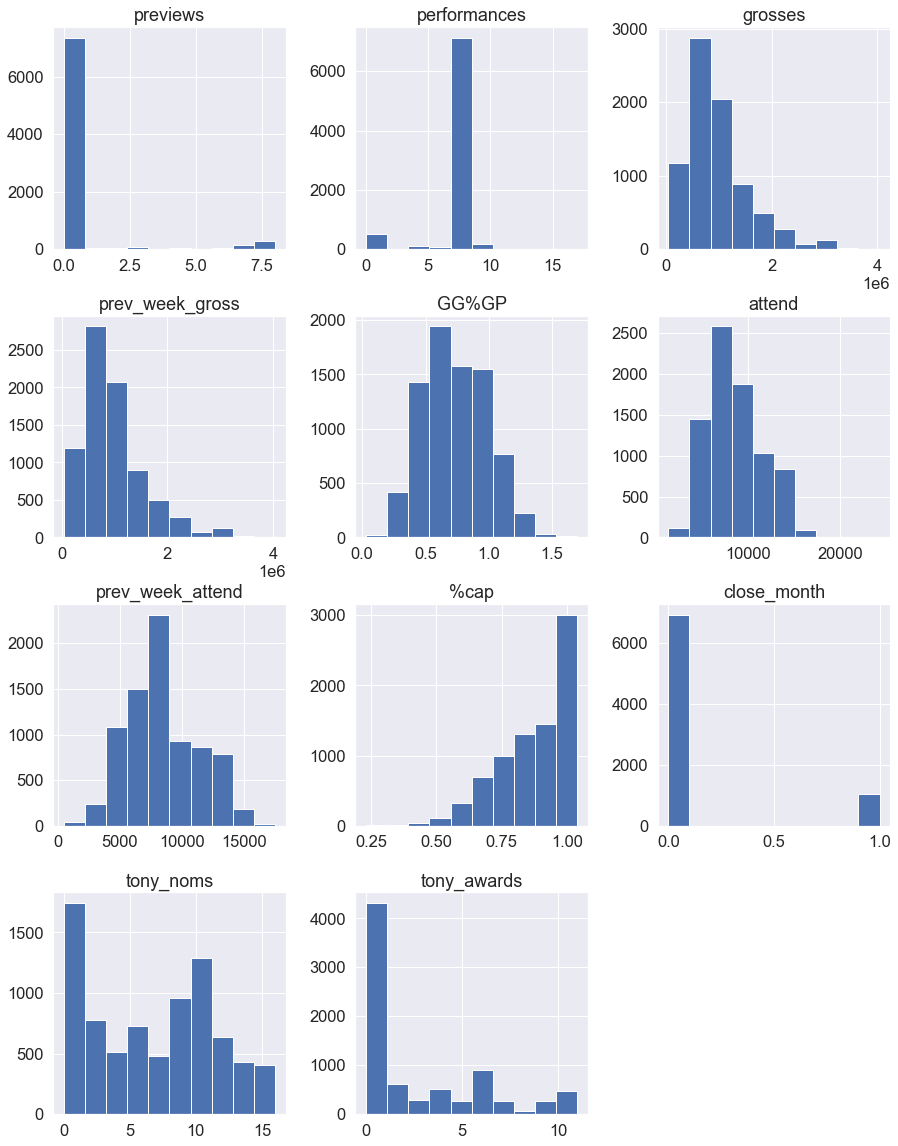

In [381]:
df.hist(figsize=(15,20))

### Hamilton Data

In [382]:
df_hamilton = df[df.show.str.contains('Hamilton')]

In [383]:
df_hamilton.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2015-07-26,Hamilton,Musical,Richard Rodgers,7,0,1302511,1288436.0,1.12,9290,9273.0,1.00,0,Drama,16,11
2015-08-02,Hamilton,Musical,Richard Rodgers,8,0,1490816,1302511.0,1.12,10619,9290.0,1.00,0,Drama,16,11
2015-08-09,Hamilton,Musical,Richard Rodgers,4,4,1255163,1490816.0,0.94,10638,10619.0,1.01,0,Drama,16,11
2015-08-16,Hamilton,Musical,Richard Rodgers,0,8,1459314,1255163.0,1.09,10706,10638.0,1.01,0,Drama,16,11
2015-08-23,Hamilton,Musical,Richard Rodgers,0,8,1456753,1459314.0,1.09,10708,10706.0,1.01,0,Drama,16,11


### Beetlejuice Data

In [384]:
df_beetlejuice = df[df.show.str.contains('Beetlejuice')]

In [385]:
df_beetlejuice.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2019-04-07,Beetlejuice,Musical,Winter Garden,7,0,765711,332008.0,0.65,9903,2700.0,0.95,0,Comedy,8,0
2019-04-14,Beetlejuice,Musical,Winter Garden,7,0,686456,765711.0,0.59,9506,9903.0,0.91,0,Comedy,8,0
2019-04-21,Beetlejuice,Musical,Winter Garden,7,0,797929,686456.0,0.68,10375,9506.0,0.99,0,Comedy,8,0
2019-04-28,Beetlejuice,Musical,Winter Garden,4,4,834395,797929.0,0.63,11977,10375.0,1.00,0,Comedy,8,0
2019-05-05,Beetlejuice,Musical,Winter Garden,0,8,818904,834395.0,0.60,10086,11977.0,0.84,0,Comedy,8,0


### Anastasia Data

In [386]:
df_anastasia = df[df.show.str.contains('Anastasia')]

In [387]:
df_anastasia

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-04-02,Anastasia,Musical,Broadhurst,7,0,971783,629307.0,0.97,8012,4572.0,1.00,0,Classic,2,0
2017-04-09,Anastasia,Musical,Broadhurst,7,0,922021,971783.0,0.92,7847,8012.0,0.98,0,Classic,2,0
2017-04-16,Anastasia,Musical,Broadhurst,8,0,1207938,922021.0,1.05,9196,7847.0,1.01,0,Classic,2,0
2017-04-23,Anastasia,Musical,Broadhurst,8,0,989231,1207938.0,0.86,9061,9196.0,0.99,0,Classic,2,0
2017-04-30,Anastasia,Musical,Broadhurst,0,8,882853,989231.0,0.77,9030,9061.0,0.99,0,Classic,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-03,Anastasia,Musical,Broadhurst,0,8,557480,638470.0,0.51,7020,7576.0,0.77,1,Classic,2,0
2019-03-10,Anastasia,Musical,Broadhurst,0,8,681938,557480.0,0.62,7499,7020.0,0.82,1,Classic,2,0
2019-03-17,Anastasia,Musical,Broadhurst,0,8,837803,681938.0,0.77,9055,7499.0,0.99,1,Classic,2,0


## Time Plots

In [388]:
import plotly.express as px

### % Capacity Filled

**HAMILTON**

In [389]:
px.line(df_hamilton, x=df_hamilton.index, y='%cap')

**BEETLEJUICE**

In [390]:
px.line(df_beetlejuice, x=df_beetlejuice.index, y='%cap')

**ANASTASIA**

In [391]:
px.line(df_anastasia, x=df_anastasia.index, y='%cap')

### Weekly Grosses

**HAMILTON**

In [392]:
px.line(df_hamilton, x=df_hamilton.index, y='grosses')

**BEETLEJUICE**

In [393]:
px.line(df_beetlejuice, x=df_beetlejuice.index, y='grosses')

**ANASTASIA**

In [394]:
px.line(df_anastasia, x=df_anastasia.index, y='grosses')

## General EDA

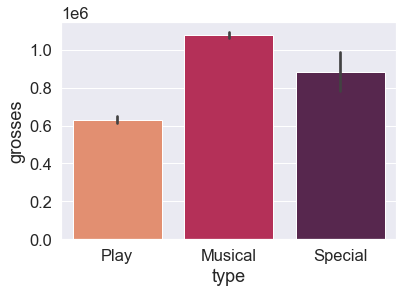

In [395]:
sns.barplot(data=df, x='type', y='grosses', palette = 'rocket_r')
plt.show()

In [396]:
from matplotlib import pyplot

In [397]:
df_musical = df[df.type.str.contains('Musical')]

In [398]:
df_musical.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2019-03-31,Ain't too proud,Musical,Imperial,0,8,1330046,1102218.0,0.92,11176,11378.0,0.98,0,Jukebox,12,1
2019-03-10,Ain't too proud,Musical,Imperial,7,0,872597,472627.0,0.70,9233,4164.0,0.93,0,Jukebox,12,1
2019-03-17,Ain't too proud,Musical,Imperial,7,0,949781,872597.0,0.76,9810,9233.0,0.98,0,Jukebox,12,1
2019-03-24,Ain't too proud,Musical,Imperial,4,4,1102218,949781.0,0.76,11378,9810.0,1.00,0,Jukebox,12,1
2019-04-07,Ain't too proud,Musical,Imperial,0,8,1337083,1330046.0,0.93,10943,11176.0,0.96,0,Jukebox,12,1


In [399]:
df_musical.show.nunique()

94

<function matplotlib.pyplot.show(close=None, block=None)>

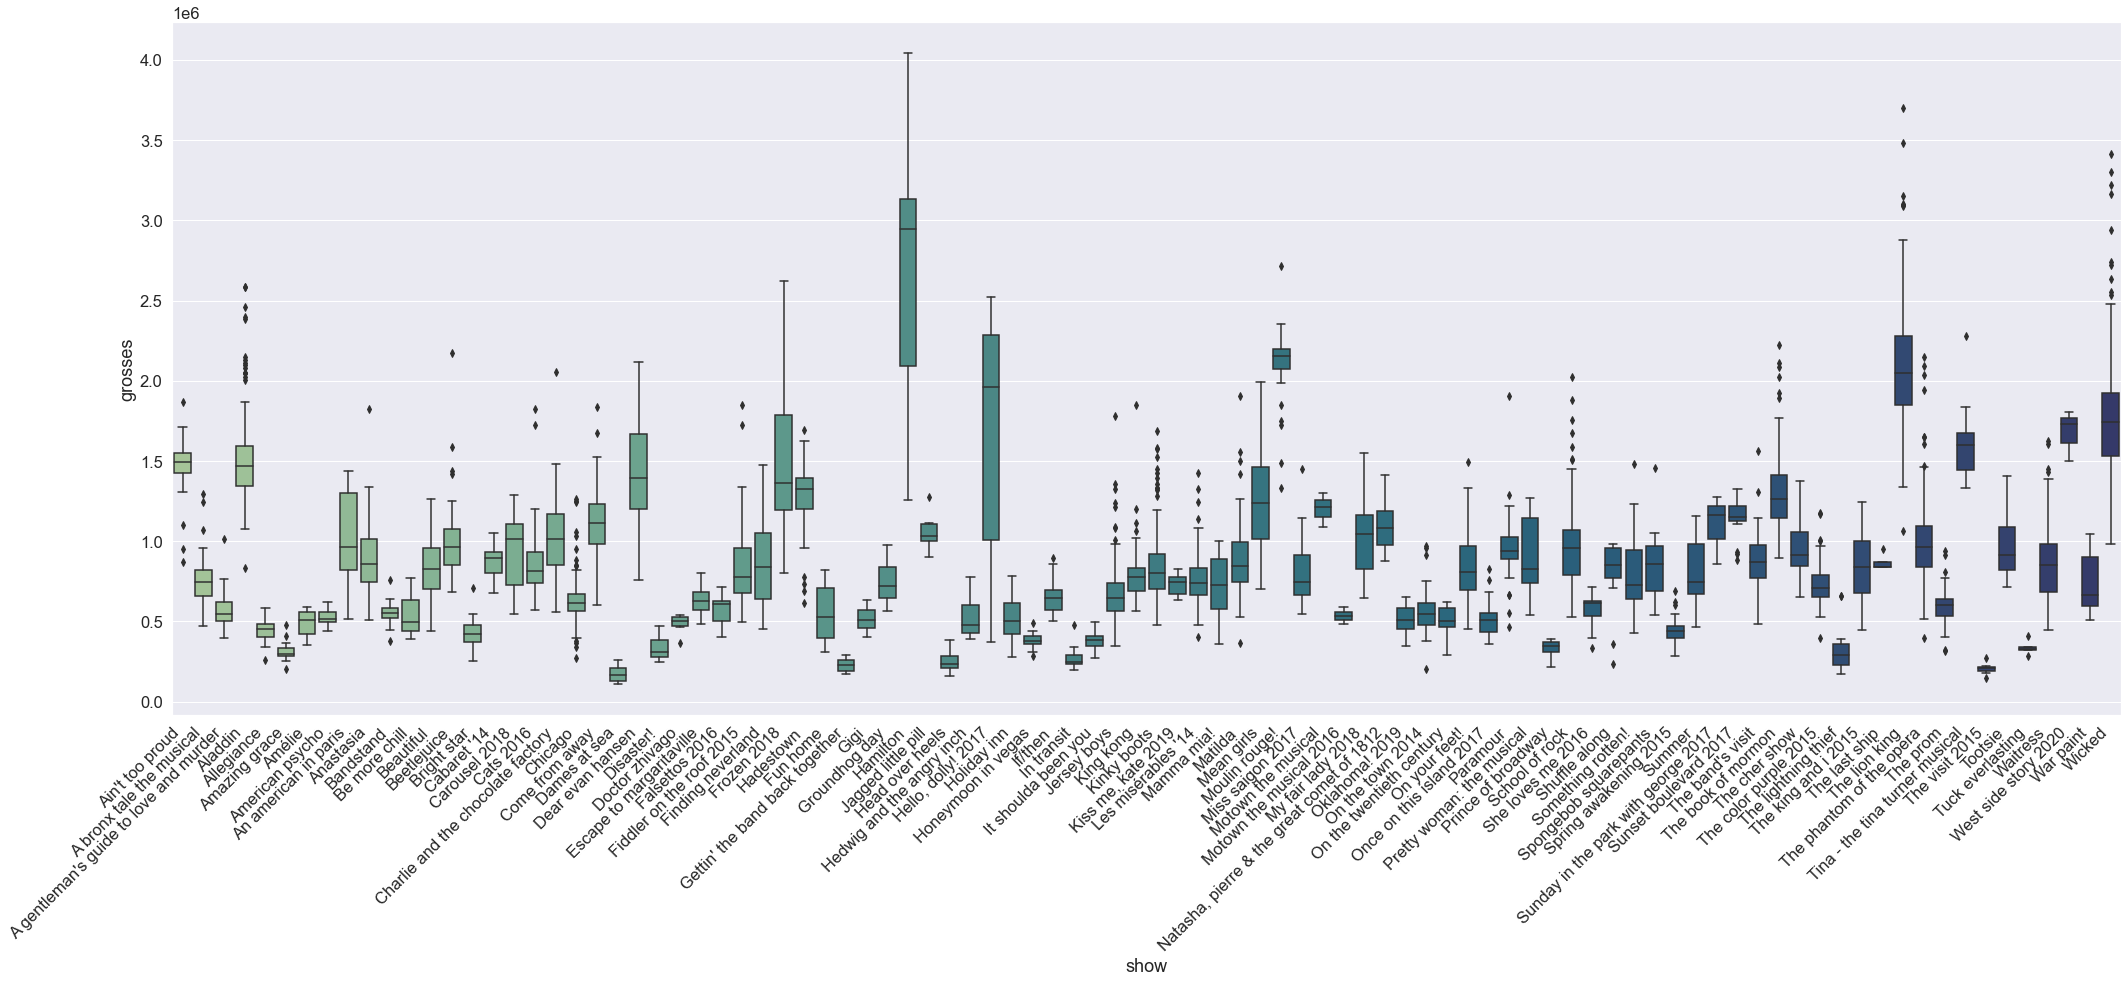

In [400]:
fig, ax = pyplot.subplots(figsize=(30,14))

g = sns.boxplot(data=df_musical, x='show', y='grosses', palette='crest')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show

In [401]:
df_play = df[df.type.str.contains('Play')]

In [402]:
df_play.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2019-11-17,A christmas carol 2019,Play,Lyceum,8,0,257525,106450.0,0.30,4194,1651.0,0.62,0,Seasonal,5,3
2019-11-24,A christmas carol 2019,Play,Lyceum,1,7,384493,257525.0,0.45,5590,4194.0,0.82,0,Seasonal,5,3
2019-12-01,A christmas carol 2019,Play,Lyceum,0,9,734745,384493.0,0.77,5988,5590.0,0.78,0,Seasonal,5,3
2019-12-08,A christmas carol 2019,Play,Lyceum,0,8,757702,734745.0,0.90,6164,5988.0,0.91,0,Seasonal,5,3
2019-12-15,A christmas carol 2019,Play,Lyceum,0,8,822983,757702.0,0.97,6619,6164.0,0.98,0,Seasonal,5,3


<function matplotlib.pyplot.show(close=None, block=None)>

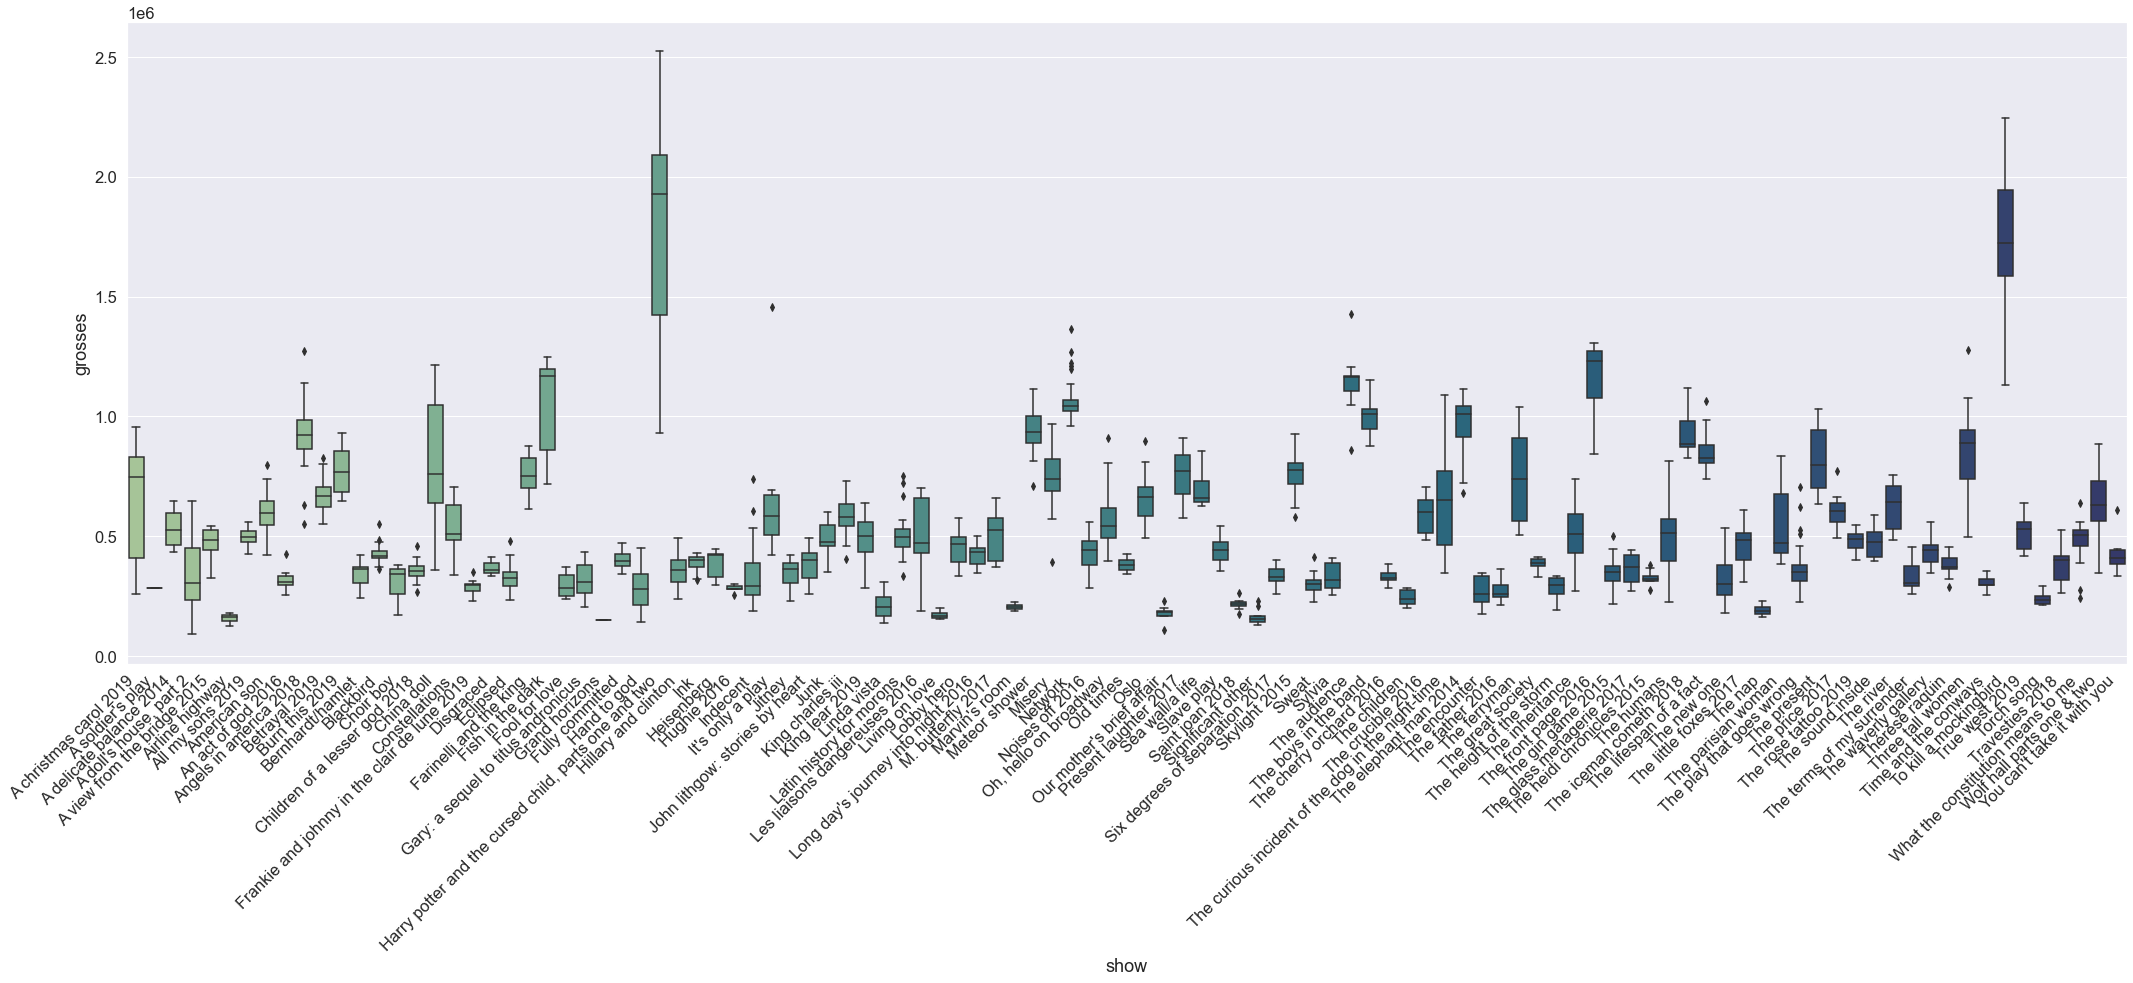

In [403]:
fig, ax = pyplot.subplots(figsize=(30,14))

g = sns.boxplot(data=df_play, x='show', y='grosses', palette='crest')
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show

<AxesSubplot:xlabel='%cap', ylabel='GG%GP'>

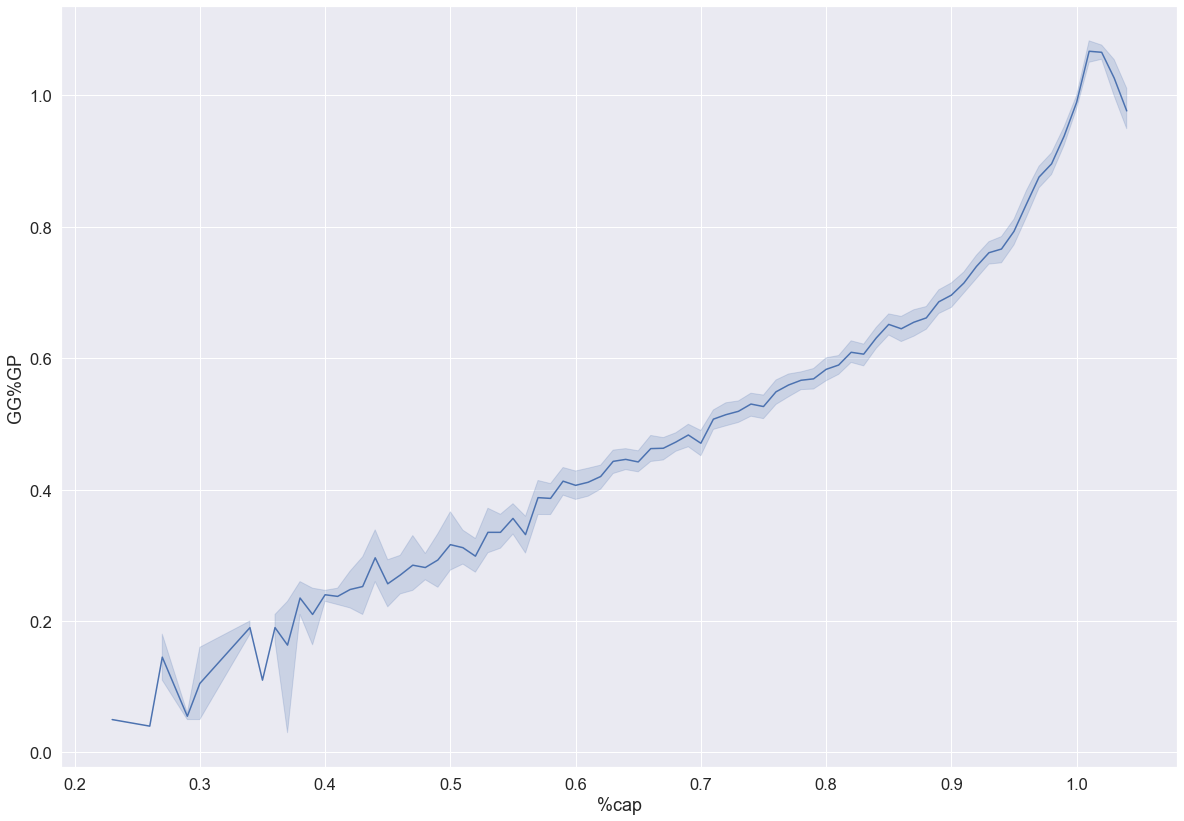

In [404]:
fig, ax = pyplot.subplots(figsize=(20,14))
sns.lineplot(data=df, x='%cap', y='GG%GP')

# Baseline Modeling 

In [405]:
df = df[~df.type.str.contains("Special")]

In [406]:
df.shape

(7840, 15)

## One Hote Encoding

In [407]:
df = pd.get_dummies(df, columns = ['show', 'type', 'theatre', 'genre'], drop_first = True)

In [408]:
df.shape

(7840, 262)

**CREATE VARIABLES**

In [409]:
X = df.drop('close_month', axis = 1)
y = df['close_month']

In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Models

## SVM

In [411]:
from sklearn.svm import SVC
svcls = SVC(kernel='rbf', C=1, gamma = 2**-5)
svc = svcls.fit(X_train, y_train)

In [412]:
y_pred_svc = svcls.predict(X_test)

In [413]:
from sklearn.metrics import classification_report

In [414]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1691
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1960
   macro avg       0.43      0.50      0.46      1960
weighted avg       0.74      0.86      0.80      1960



/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [415]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_svc)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[1691    0]
 [ 269    0]]


In [416]:
from sklearn.metrics import plot_confusion_matrix

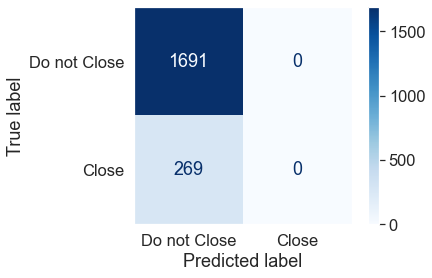

In [417]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Do not Close', 'Close'])
plt.grid(False)
plt.show()

### Class Imbalance

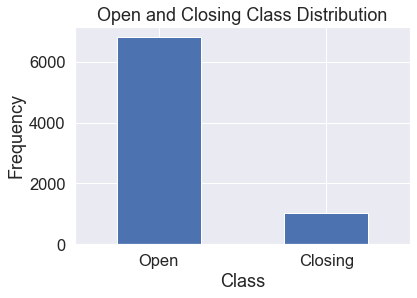

In [418]:
count_classes = pd.value_counts(df['close_month'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Open and Closing Class Distribution")
plt.xticks((0,1), ('Open', 'Closing'))
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

### SMOTE

In [419]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)


##finding shortcuts for printing clean data results
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (Percentage):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7840, 261)
Shape of X after SMOTE: (13622, 261)

Balance of positive and negative classes (Percentage):


1    50.0
0    50.0
Name: close_month, dtype: float64

In [420]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)


### SVM Rerun

In [421]:
svc = svcls.fit(X_train, y_train)
y_pred_svc = svcls.predict(X_test)

In [422]:
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[   0 1745]
 [   0 1661]]


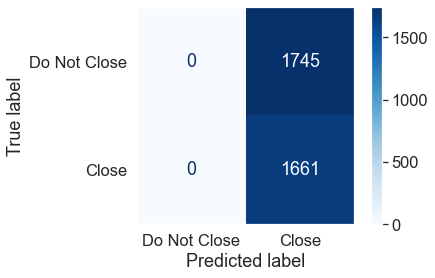

In [423]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Do Not Close', 'Close'])
plt.grid(False)
plt.show()

In [424]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1745
           1       0.49      1.00      0.66      1661

    accuracy                           0.49      3406
   macro avg       0.24      0.50      0.33      3406
weighted avg       0.24      0.49      0.32      3406



/Users/andrewozbun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Random Forest

In [425]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=32,  
                             max_leaf_nodes=40)
rf_clf = clf.fit(X_train,y_train)

y_pred_rf = clf.predict(X_test)

In [426]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1745
           1       0.90      0.88      0.89      1661

    accuracy                           0.90      3406
   macro avg       0.90      0.89      0.90      3406
weighted avg       0.90      0.90      0.90      3406



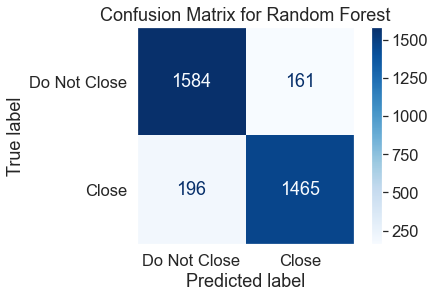

In [427]:
plot_confusion_matrix(rf_clf, X_test, y_test,  cmap=plt.cm.Blues, display_labels = ['Do Not Close', 'Close'] )
plt.title('Confusion Matrix for Random Forest')
plt.grid(False)
plt.show()

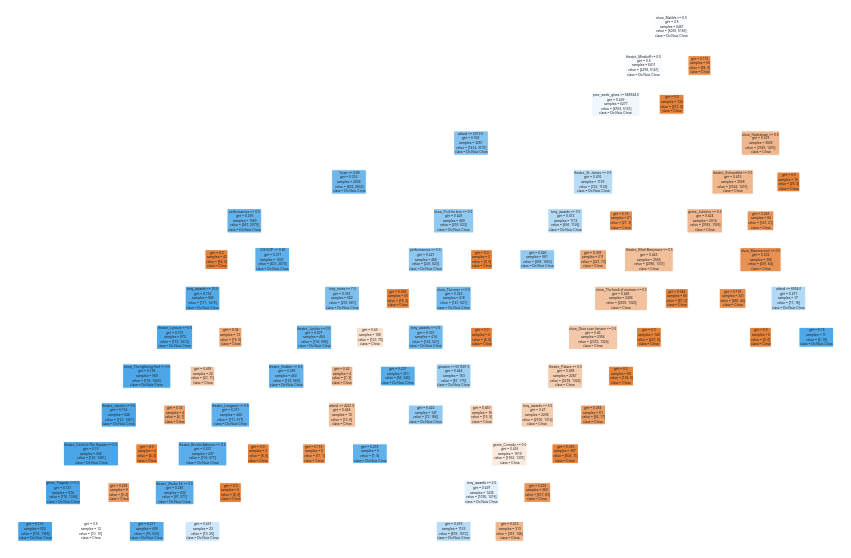

In [428]:
## Initial overfitting in this plot
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(rf_clf.estimators_[2], rounded = True, 
               filled = True, 
               class_names = ['Close', 'Do Note Close'], 
               feature_names = X.columns)
plt.show()

### Overfitting

## Feature Importance

While it is great that we can predict when a broadway show is going to close with such high accuracy, we also have to wonder what the main things were that 

In [434]:
important_features_dict = {}
for idx, val in enumerate(clf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('9 most important features:', important_features_list[:9])

9 most important features: [6, 8, 3, 2, 4, 9, 256, 5, 254]


In [454]:
data = important_features_dict
col = X.columns.tolist()

df_fi = pd.DataFrame.from_dict(data, orient='index',
                               columns=['feat_im'])
df_fi['feature'] = col

df_fi.head()

,feat_im,feature
0,0.036010,previews
1,0.036486,performances
2,0.060010,grosses
3,0.086856,prev_week_gross
4,0.059040,GG%GP


In [459]:
df_sorted = df_fi.sort_values('feat_im', ascending=False)
df_final = df_sorted.iloc[:9]

In [461]:
df_final.head(9)

,feat_im,feature
6,0.122495,prev_week_attend
8,0.113433,tony_noms
3,0.086856,prev_week_gross
2,0.060010,grosses
4,0.059040,GG%GP
9,0.058625,tony_awards
256,0.040797,genre_Jukebox
5,0.038209,attend
254,0.037555,genre_Comedy


In [465]:
labels = ['Previous Weeks Attendance', '# Tony Nominations', 'Previous Weeks Gross', 'Current Gross', 'GG%GP',
          '# Tony Awards', 'Jukebox Musical Genre', 'Current Attendance', 'Comedy Genre']

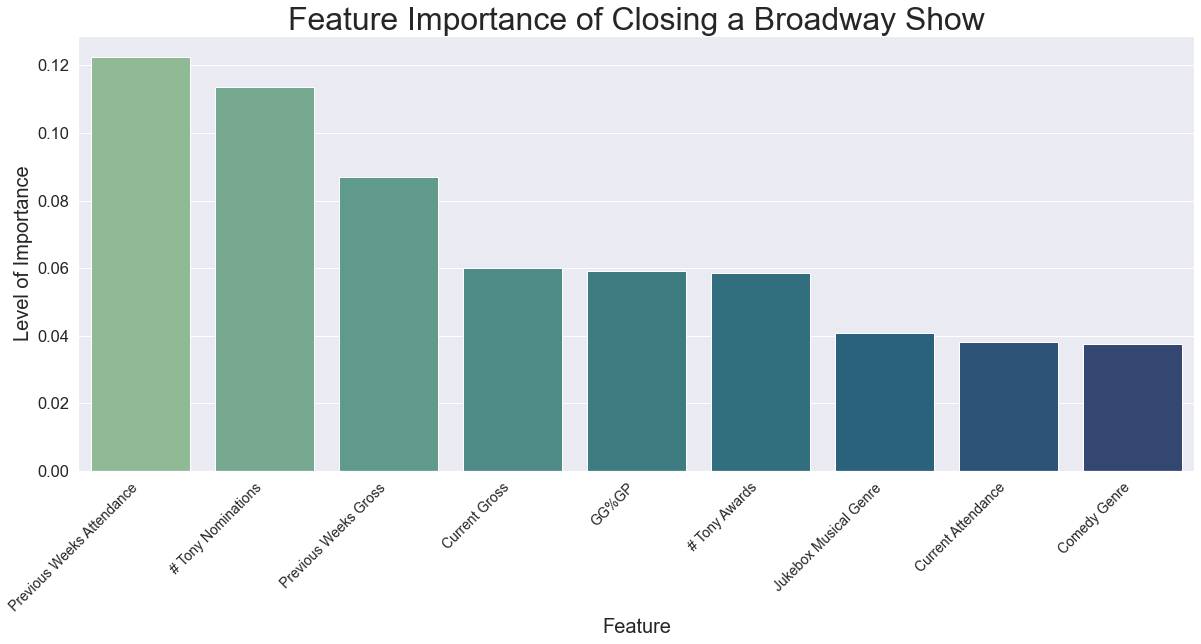

In [471]:
fig, ax = pyplot.subplots(figsize=(20,8))

g = sns.barplot(data=df_final, x='feature', y='feat_im', palette= 'crest')
g.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)

plt.xlabel("Feature", fontsize=20)
plt.ylabel("Level of Importance", fontsize=20)
plt.title("Feature Importance of Closing a Broadway Show", fontsize=32)
plt.tight_layout
plt.show()

# Conclusion